**IMPORTING REQUIRED LIBRARIES**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**LOADING THE DATASET**

In [ ]:
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (2).csv')

**CALCULATING THE AVERAGE OF SO2,NO2 AND RSPM/PM10 ON THE BASIS OF City/Town/Village/Area**

In [ ]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (2).csv')

# Group the data by the 'Region' column and calculate the mean for each group
grouped = data.groupby('City/Town/Village/Area')[['SO2', 'NO2', 'RSPM/PM10']].mean()

# Display the calculated averages
print(grouped)

                              SO2        NO2  RSPM/PM10
City/Town/Village/Area                                 
Chennai                 13.014042  22.088442  58.998000
Coimbatore               4.541096  25.325342  49.217241
Cuddalore                8.965986  19.710884  61.881757
Madurai                 13.319728  25.768707  45.724490
Mettur                   8.429268  23.185366  52.721951
Salem                    8.114504  28.664122  62.954198
Thoothukudi             12.989691  18.512027  83.458904
Trichy                  15.293956  18.695055  85.054496


**VISUALIZATION OF DAILY AVERAGE OF SO2 AND NO2.**

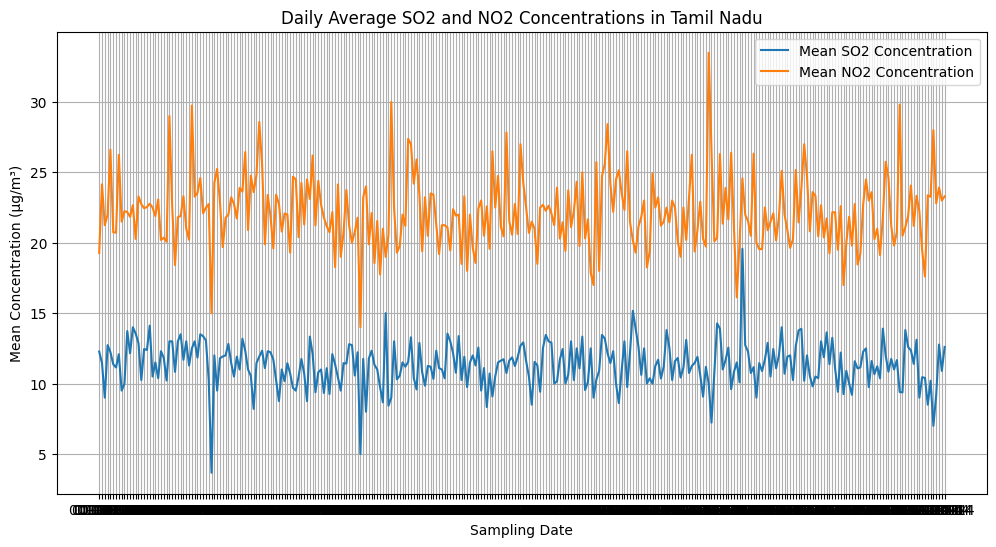

In [ ]:
# Calculate daily average SO2 and NO2 concentrations for all monitoring stations
daily_mean = data.groupby('Sampling Date')[['SO2', 'NO2']].mean()

# Plot daily average SO2 and NO2 concentrations
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['SO2'], label='Mean SO2 Concentration')
plt.plot(daily_mean.index, daily_mean['NO2'], label='Mean NO2 Concentration')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration (µg/m³)')  # Units may vary based on your data
plt.title('Daily Average SO2 and NO2 Concentrations in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()

**CALCULATING THE AVERAGE OF SO2, NO2 AND RSPM/PM10 FOR ALL THE Monitoring Stations.**

In [ ]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (2).csv')

# Group the data by the 'Region' column and calculate the mean for each group
grouped = data.groupby('Location of Monitoring Station')[['SO2', 'NO2', 'RSPM/PM10']].mean()

# Display the calculated averages
print(grouped)

                                                          SO2        NO2  \
Location of Monitoring Station                                             
AVM Jewellery Building, Tuticorin                    9.302083  12.697917   
Adyar, Chennai                                      13.252174  18.965217   
Anna Nagar, Chennai                                 13.873874  20.754545   
Bishop Heber College, Tirchy                        11.800000  14.942857   
Central Bus Stand, Trichy                           18.013333  21.506667   
District Environmental Engineer Office, Imperia...   8.101010  19.151515   
Distt. Collector's Office, Coimbatore                4.554348  25.793478   
Eachangadu Villagae                                 11.916667  22.395833   
Fenner (I) Ltd. Employees Assiciation Building ...  13.643564  27.198020   
Fisheries College, Tuticorin                        14.526882  20.204301   
Gandhi Market, Trichy                               17.148649  20.797297   
Golden Rock,

**VISUALIZATION OF DAILY AVERAGE OF RSPM/PM10 CONCENTRATION FOR ALL MONITORING SYSTEMS.**

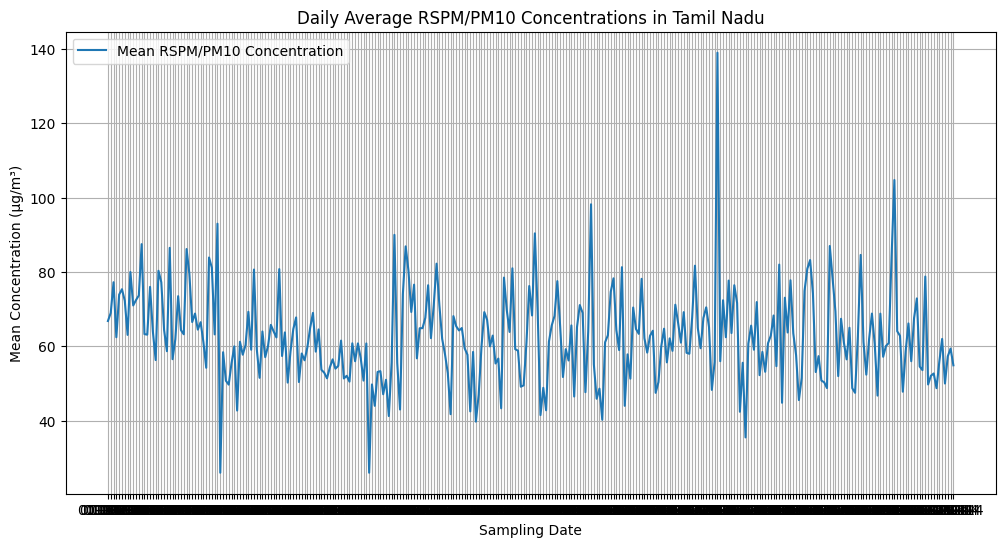

In [ ]:
# Calculate daily average RSPM/PM10 concentrations for all monitoring stations
daily_mean = data.groupby('Sampling Date')[['RSPM/PM10']].mean()

# Plot daily average RSPM/PM10 concentrations
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['RSPM/PM10'], label='Mean RSPM/PM10 Concentration')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration (µg/m³)')  # Units may vary based on your data
plt.title('Daily Average RSPM/PM10 Concentrations in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()

**SORTED AVERAGE POLLUTION OF EACH City/Town/Village/Area**

In [1]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Calculate the average pollution level for each area
data['Average_Pollution'] = data[['SO2', 'NO2', 'RSPM/PM10']].mean(axis=1)

# Sort the areas in increasing order of average pollution levels
sorted_data = data.sort_values(by='Average_Pollution',ascending = False)

# Display the sorted DataFrame
print(sorted_data[['C', 'Average_Pollution']])


     City/Town/Village/Area  Average_Pollution
354                 Chennai         113.500000
2636                 Trichy         107.000000
438                 Chennai         102.000000
2844                 Trichy         100.333333
2846                 Trichy         100.333333
...                     ...                ...
1556              Cuddalore          11.333333
849                 Chennai          11.333333
1563              Cuddalore          11.333333
1557              Cuddalore          11.000000
1562              Cuddalore          10.666667

[2879 rows x 2 columns]


**VISUALIZATION OF AVERAGE OF SO2 AND NO2 USING MAP.**

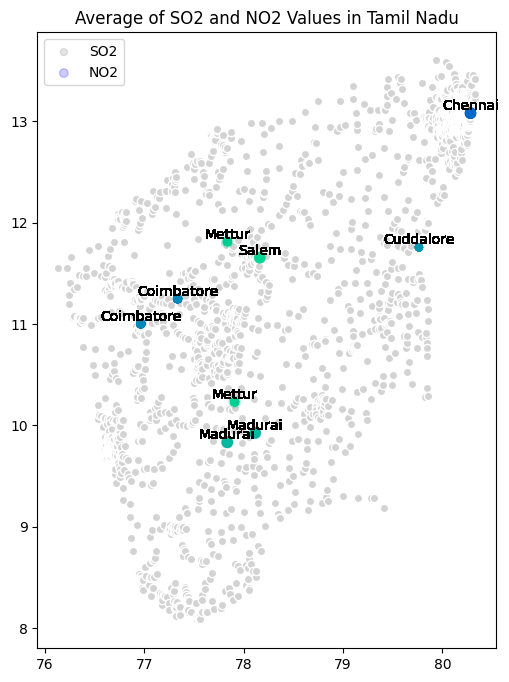

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load geographic boundary data for Tamil Nadu (replace 'tamil_nadu_location.shp' with the actual file path)
tamil_nadu_boundary = gpd.read_file('/content/tamil_nadu_location.shp', encoding='utf-8')


# Merge your data with the Tamil Nadu boundary data based on a common identifier (e.g., location name)
merged_data = tamil_nadu_boundary.merge(data, left_on='NAME', right_on='City/Town/Village/Area', how='right')

# Create a map with the Tamil Nadu boundary data
ax = tamil_nadu_boundary.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the locations and values on the map
merged_data.plot(ax=ax, markersize=merged_data['SO2'], alpha=0.1, legend=True, cmap='gist_heat', label = "SO2")
merged_data.plot(ax=ax, markersize=merged_data['NO2'], alpha=0.2, legend=True, cmap='winter', label = "NO2")

# Add place names as labels to the points on the map
for x, y, label in zip(merged_data.geometry.x, merged_data.geometry.y, merged_data['City/Town/Village/Area']):
   if not pd.isna(x) and not pd.isna(y):
        plt.annotate(label, (x, y), fontsize=10, ha='center', va='bottom')


plt.title('Average of SO2 and NO2 Values in Tamil Nadu')
ax.legend()
plt.show()